## Final Project Submission

Please fill out:
* Student name: Mays Alkhwitar
* Student pace: self paced 
* Scheduled project review date/time: 
* Instructor name: Claude Fried
* Blog post URL:https://github.com/maysasaad/dsc-sklearn-preprocessing-lab


# Home Sales Prices

![images.jpg](data/image/images.jpg)

# Overview
The goal of this project is to use multiple linear regression modeling to analyze house sales in a northwestern county.

# Business Understanding
A real estate agency needs to provide advice to homeowners about how home renovations might increase the estimated value of their homes, and by what amount.

#  Data Understanding
This project uses the King County House Sales dataset, which can be found in kc_house_data.csv in the data folder .

The dataset that I used included two types of variables  :

1-dependent variable (Home Prices).

2-Independent variable like (Number of bedrooms,Number of bathrooms, Number of floors in house ,condition,grade,ext)

# Data Preparation

## Importing the dataset
Let's start by importing the dataset from csv file into a pandas dataframe using pandas read_csv()

In [174]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn')

In [175]:
house = pd.read_csv('data/kc_house_data.csv')
house.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [176]:
house = house.drop(columns=["id","date","view","sqft_above","sqft_basement","yr_renovated","zipcode","lat","long","sqft_living15","sqft_lot15"],axis=1)
house

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built
0,221900.0,3,1.00,1180,5650,1.0,NaN,Average,7 Average,1955
1,538000.0,3,2.25,2570,7242,2.0,NO,Average,7 Average,1951
2,180000.0,2,1.00,770,10000,1.0,NO,Average,6 Low Average,1933
3,604000.0,4,3.00,1960,5000,1.0,NO,Very Good,7 Average,1965
4,510000.0,3,2.00,1680,8080,1.0,NO,Average,8 Good,1987
...,...,...,...,...,...,...,...,...,...,...
21592,360000.0,3,2.50,1530,1131,3.0,NO,Average,8 Good,2009
21593,400000.0,4,2.50,2310,5813,2.0,NO,Average,8 Good,2014
21594,402101.0,2,0.75,1020,1350,2.0,NO,Average,7 Average,2009
21595,400000.0,3,2.50,1600,2388,2.0,NaN,Average,8 Good,2004


In [177]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        21597 non-null  float64
 1   bedrooms     21597 non-null  int64  
 2   bathrooms    21597 non-null  float64
 3   sqft_living  21597 non-null  int64  
 4   sqft_lot     21597 non-null  int64  
 5   floors       21597 non-null  float64
 6   waterfront   19221 non-null  object 
 7   condition    21597 non-null  object 
 8   grade        21597 non-null  object 
 9   yr_built     21597 non-null  int64  
dtypes: float64(3), int64(4), object(3)
memory usage: 1.6+ MB


In [178]:
house.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,yr_built
count,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000
mean,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,1970.999676
std,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,29.375234
min,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,1900.000000
25%,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,1951.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,1975.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,1997.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,2015.000000


In [179]:
house["floors"].value_counts()

1.0    10673
2.0     8235
1.5     1910
3.0      611
2.5      161
3.5        7
Name: floors, dtype: int64

In [180]:
house["floors"] =house["floors"].astype("str")

In [181]:
house["floors"].dtype


dtype('O')

In [182]:
#Identify target variable
target = 'price'


In [183]:
#Extract Catagorical Variables
categoricals= house.select_dtypes(include=object)
categoricals.head()

,floors,waterfront,condition,grade
0,1.0,NaN,Average,7 Average
1,2.0,NO,Average,7 Average
2,1.0,NO,Average,6 Low Average
3,1.0,NO,Very Good,7 Average
4,1.0,NO,Average,8 Good


In [184]:
#Column Values and Null Counts:
# print .value_counts() for each column in obj_df
for column in categoricals.columns:
    print(f"COLUMN: '{column}'")
    print(f"Number of unique values: {len(categoricals[column].unique())}")
    print(f"Number of nulls: {categoricals[column].isnull().sum()}")
    print(categoricals[column].value_counts())
    print()

COLUMN: 'floors'
Number of unique values: 6
Number of nulls: 0
1.0    10673
2.0     8235
1.5     1910
3.0      611
2.5      161
3.5        7
Name: floors, dtype: int64

COLUMN: 'waterfront'
Number of unique values: 3
Number of nulls: 2376
NO     19075
YES      146
Name: waterfront, dtype: int64

COLUMN: 'condition'
Number of unique values: 5
Number of nulls: 0
Average      14020
Good          5677
Very Good     1701
Fair           170
Poor            29
Name: condition, dtype: int64

COLUMN: 'grade'
Number of unique values: 11
Number of nulls: 0
7 Average        8974
8 Good           6065
9 Better         2615
6 Low Average    2038
10 Very Good     1134
11 Excellent      399
5 Fair            242
12 Luxury          89
4 Low              27
13 Mansion         13
3 Poor              1
Name: grade, dtype: int64



In [185]:
categoricals.isna().sum()

floors           0
waterfront    2376
condition        0
grade            0
dtype: int64

In [186]:
categoricals.dropna()

,floors,waterfront,condition,grade
1,2.0,NO,Average,7 Average
2,1.0,NO,Average,6 Low Average
3,1.0,NO,Very Good,7 Average
4,1.0,NO,Average,8 Good
5,1.0,NO,Average,11 Excellent
...,...,...,...,...
21591,2.0,NO,Average,8 Good
21592,3.0,NO,Average,8 Good
21593,2.0,NO,Average,8 Good
21594,2.0,NO,Average,7 Average


### Data Preparation
Prior to analysis, it is important to know the nature of the data. pandas.info() can show us the data types in each column.

In [187]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        21597 non-null  float64
 1   bedrooms     21597 non-null  int64  
 2   bathrooms    21597 non-null  float64
 3   sqft_living  21597 non-null  int64  
 4   sqft_lot     21597 non-null  int64  
 5   floors       21597 non-null  object 
 6   waterfront   19221 non-null  object 
 7   condition    21597 non-null  object 
 8   grade        21597 non-null  object 
 9   yr_built     21597 non-null  int64  
dtypes: float64(2), int64(4), object(4)
memory usage: 1.6+ MB


We can see that the column date is an object that can be converted to date type. grade contains numerical and text information. view and condition also have object data type. sqft_basement should be numeric but has an object data type.

#### Data Cleaning
In this section, the data is going to cleaned.Lets check for NaN values.



In [188]:
house.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,yr_built
count,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000
mean,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1970.999676
std,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,29.375234
min,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1900.000000
25%,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1951.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1975.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,1997.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,2015.000000


In [189]:
# Distinguish between the continuous and categoricals Features
continuous = ['bedrooms','sqft_living','sqft_lot','yr_built','bathrooms','price']
categoricals = ['waterfront','grade','condition','floors']

## Dealing with Categorical Variables

Variable Descriptions
Look in data_description.txt for a full description of all variables.

A preview of some of the columns: *id` - Unique identifier for a house

date - Date house was sold

price - Sale price (prediction target)

bedrooms - Number of bedrooms

bathrooms - Number of bathrooms

sqft_living - Square footage of living space in the home

sqft_lot - Square footage of the lot

floors - Number of floors (levels) in house

waterfront - Whether the house is on a waterfront

Includes Duwamish, Elliott Bay, Puget Sound, Lake Union, Ship Canal, Lake Washington, Lake Sammamish, other lake, and river/slough waterfronts
view - Quality of view from house

Includes views of Mt. Rainier, Olympics, Cascades, Territorial, Seattle Skyline, Puget Sound, Lake Washington, Lake Sammamish, small lake / river / creek, and other
condition - How good the overall condition of the house is. Related to maintenance of house.

grade` - Overall grade of the house. Related to the construction and design of the house.

sqft_above - Square footage of house apart from basement

sqft_basement - Square footage of the basement

yr_built - Year when house was built

yr_renovated - Year when house was renovated

zipcode - ZIP Code used by the United States Postal Service

lat - Latitude coordinate

long - Longitude coordinate

sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors

sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors

## Plot Categorical Variables

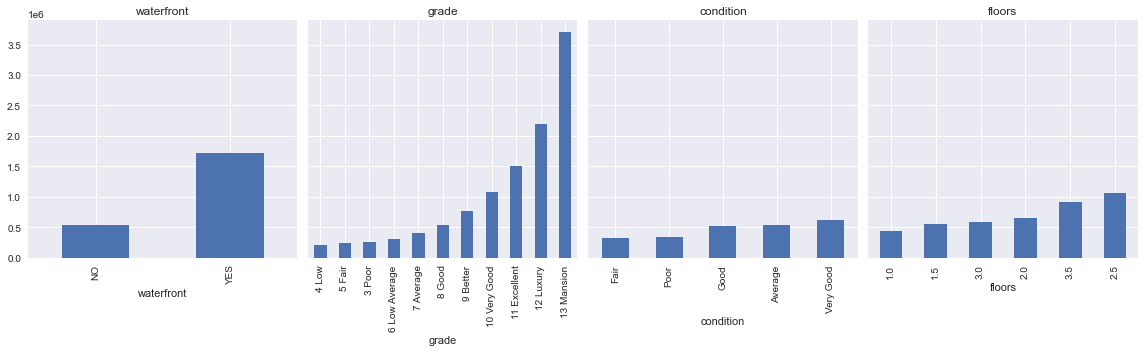

In [190]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(16,5), sharey=True)

categoricals = ['waterfront','grade','condition','floors']

for col, ax in zip(categoricals, axes.flatten()):
    (house.groupby(col)               # group values together by column of interest
         .mean()['price']        # take the mean of the saleprice for each group
         .sort_values()              # sort the groups in ascending order
         .plot
         .bar(ax=ax))                # create a bar graph on the ax
    
    ax.set_title(col)                # Make the title the name of the column
    
fig.tight_layout()

## Create dummy variables
Create dummy variables for the  categorical features you chose remembering to drop the first. Drop the categorical columns that you used, concat the dummy columns to our continuous variables and asign it to a new variable 

In [191]:
dummies = pd.get_dummies(house[categoricals], prefix=categoricals, drop_first=True)
dummies

,waterfront_YES,grade_11 Excellent,grade_12 Luxury,grade_13 Mansion,grade_3 Poor,grade_4 Low,grade_5 Fair,grade_6 Low Average,grade_7 Average,grade_8 Good,grade_9 Better,condition_Fair,condition_Good,condition_Poor,condition_Very Good,floors_1.5,floors_2.0,floors_2.5,floors_3.0,floors_3.5
0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
21593,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
21594,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
21595,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0


In [192]:
house_preprocessed = house.drop(['waterfront','grade','condition','floors'], axis=1)

In [193]:
house_preprocessed = pd.concat([house_preprocessed,dummies],axis=1)
house_preprocessed.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,yr_built,waterfront_YES,grade_11 Excellent,grade_12 Luxury,grade_13 Mansion,...,grade_9 Better,condition_Fair,condition_Good,condition_Poor,condition_Very Good,floors_1.5,floors_2.0,floors_2.5,floors_3.0,floors_3.5
0,221900.0,3,1.00,1180,5650,1955,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,538000.0,3,2.25,2570,7242,1951,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,180000.0,2,1.00,770,10000,1933,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,604000.0,4,3.00,1960,5000,1965,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,510000.0,3,2.00,1680,8080,1987,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Modeling

Our data has now been cleaned and ready for modeling. In this section,we will check:
    
    1-The distribution for each column.
    
    2-The linearity of each feature with price.
    
    3-Multicollinearity 

#### Plot histograms with kde overlay to check the distribution of the predictors

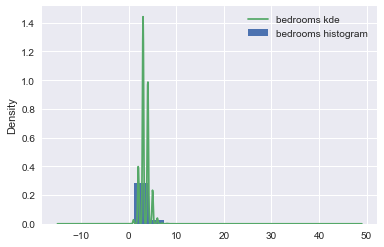

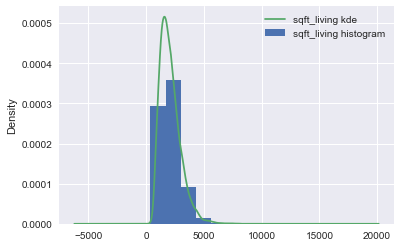

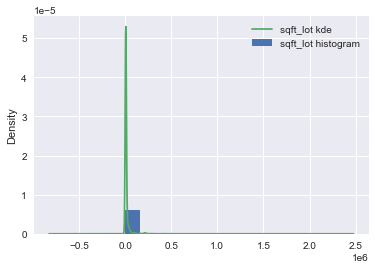

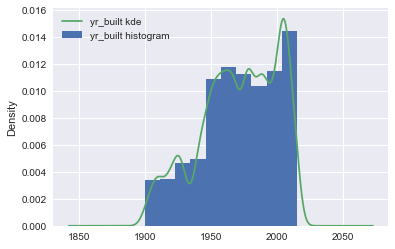

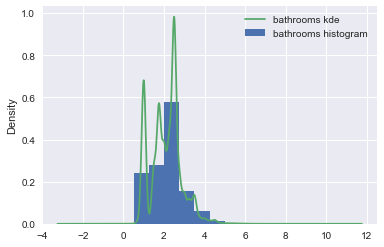

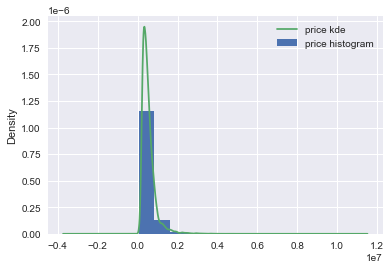

In [194]:
# For all the variables, check distribution by creating a histogram with kde

for column in house_preprocessed[continuous] :
    house_preprocessed[continuous][column].plot.hist(density=True, label = column+' histogram')
    house[column].plot.kde(label =column+' kde')
    plt.legend()
    plt.show()

No variable is "perfectly" normal, but these do tend to follow an overall normal pattern.

We see major skew in all continious predictor which could be problematic towards analysis. 

sqft_living still pretty symmetrical distributions and can be used as predictors

The target variable "price" is normally distributed with just a gentle skew

#### Test for the linearity assumption

In [195]:
l=house_preprocessed[continuous].drop(columns=["price"] , axis=1)
l

,bedrooms,sqft_living,sqft_lot,yr_built,bathrooms
0,3,1180,5650,1955,1.00
1,3,2570,7242,1951,2.25
2,2,770,10000,1933,1.00
3,4,1960,5000,1965,3.00
4,3,1680,8080,1987,2.00
...,...,...,...,...,...
21592,3,1530,1131,2009,2.50
21593,4,2310,5813,2014,2.50
21594,2,1020,1350,2009,0.75
21595,3,1600,2388,2004,2.50


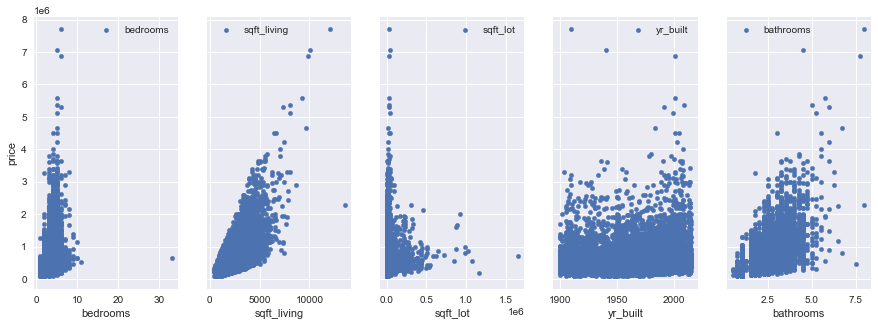

In [196]:
# visualize the relationship between the preditors and the target using scatterplots
fig, axs = plt.subplots(1, 5, sharey=True, figsize=(15, 5))
for idx, feat in enumerate(l):
    house_preprocessed[continuous].plot(kind='scatter',x=feat, y='price', ax=axs[idx], label=feat)
plt.show()

sqft_living seems to be a good feature due to highly linear relationship with sales.

bedrooms shows a linear pattern as well but there a higher level of variance in there than sqft_living.

yr_built is worse, there is too much variance along the y-axis and there's no clear linear relationship between yr_built and price.

### Run a simple regression in Statsmodels with sqft_living   as a predictor
Now, let's use the statsmodels.api to run OLS as a baseline model. Just like for linear regression with a single predictor, you can use the formula 𝑦∼𝑋

In [197]:
# import libraries
import statsmodels.api as sm
import statsmodels.formula.api as smf

# build the formula 
# use 'sqft_living' as baseline model feature
# baseline model
f = 'price~sqft_living'
# create a fitted model in one line
model = smf.ols(formula=f, data=house).fit()
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                 2.097e+04
Date:                Mon, 05 Sep 2022   Prob (F-statistic):               0.00
Time:                        17:25:53   Log-Likelihood:            -3.0006e+05
No. Observations:               21597   AIC:                         6.001e+05
Df Residuals:                   21595   BIC:                         6.001e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -4.399e+04   4410.023     -9.975      0.000   -5.26e+04   -3.53e+04
sqft_living   280.8630      1.939    144.819      0.000     277.062     284.664
==============================================================================
Omnibus:                    14801.942   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           542662.604
Skew:                           2.820   Prob(JB):                         0.00
Kurtosis:                      26.901   Cond. No.                     5.63e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.63e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

R-Squared
The or Coefficient of determination is a statistical measure that is used to assess the goodness of fit of a regression model.

The"baseline" model uses the mean of the dependent variable and always predicts this mean as the value of y for any value of x.

R-Squared can take a value between 0 and 1 where values closer to 0 represent a poor fit and values closer to 1 represent an (almost) perfect fit.



The R-squared value is 49% of the variance in the price variable can be explained by sqft_living. 

The Intercept: A "unit" decrease in sqft_living is associated with a 280.8630 "unit" 


### Assumptions for Linear Regression

#### Draw a prediction line with data points on a scatter plot for X (sqft_living) and Y (price)

   sqft_living
0          370
1        13540
0    5.993042e+04
1    3.758896e+06
dtype: float64


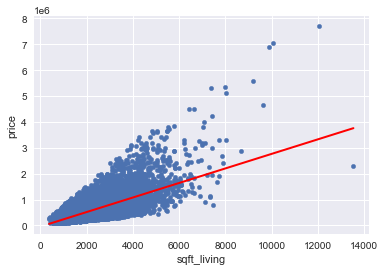

In [198]:
# create a DataFrame with the minimum and maximum values of sqft_living
X_new = pd.DataFrame({'sqft_living': [house.sqft_living.min(), house.sqft_living.max()]})
print(X_new.head())

# make predictions for those x values and store them
preds = model.predict(X_new)
print (preds)

# first, plot the observed data and the least squares line
house.plot(kind='scatter', x='sqft_living', y='price')
plt.plot(X_new, preds, c='red', linewidth=2)
plt.show()

#### Visualize the error term for variance and heteroscedasticity

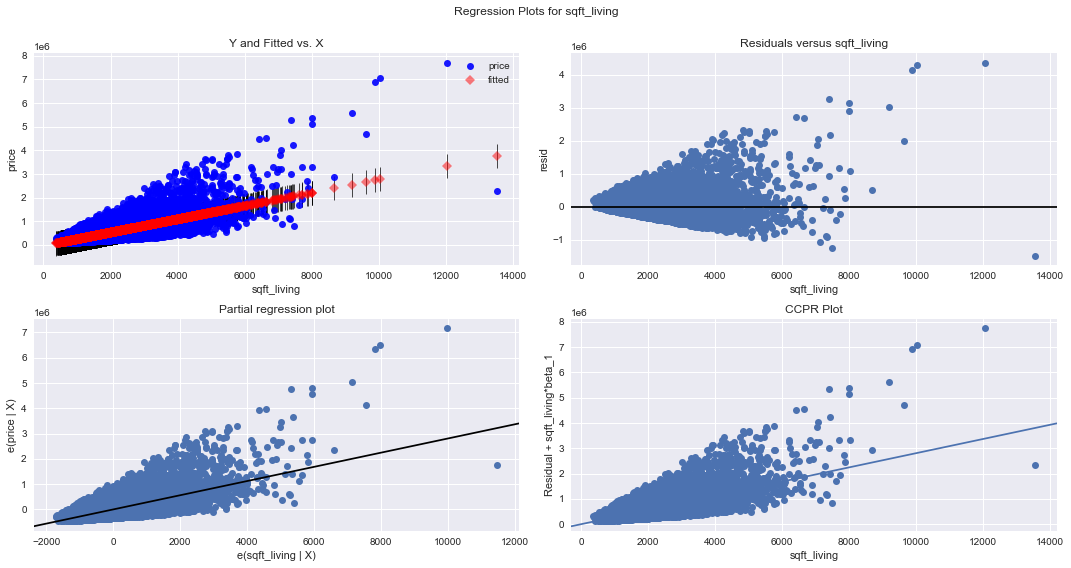

In [199]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "sqft_living", fig=fig)
plt.show()

1.The “Y and Fitted vs. X” graph plots the dependent variable against our predicted values with a confidence interval. The inverse relationship in our graph indicates that price and sqft_living are posativly correlated.

2.The “Residuals versus "sqft_living" graph shows our model's errors versus the specified predictor variable.
The figure hows a sign of heteroscedasticity.

3.The “Partial regression plot” shows the relationship between price and sqft_living,partial regression plot attempts to show the effect of adding another variable to a model that already has one or more independent variables. 

4.The Component and Component Plus Residual (CCPR) plot is an extension of the partial regression plot, but shows where our trend line would lie after adding the impact of adding our other independent variables on our existing sqft_living coefficient.

#### Check the normality assumptions by creating a QQ-plot
This plot is used to determine the normal distribution of errors.
It uses standardized values of residuals.
Ideally, this plot should show a straight line.

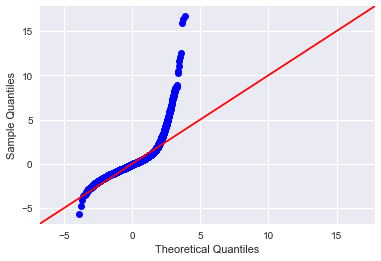

In [200]:
import scipy.stats as stats
residuals = model.resid
sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
plt.show()

We find a curved, distorted line, then the plot shows Right Skewed Q-Q plot for Normal DIstribution.


#### Run a multi linear model in Statsmodels
We know that (sqft_living) cannot entirely explain housing prices.
To get a clearer picture of what influences housing prices, we add and test different variables and analyze the regression results to see which combinations of predictor variables satisfy OLS assumptions, while remaining intuitively appealing from an economic perspective.

In [201]:
house_preprocessed

,price,bedrooms,bathrooms,sqft_living,sqft_lot,yr_built,waterfront_YES,grade_11 Excellent,grade_12 Luxury,grade_13 Mansion,...,grade_9 Better,condition_Fair,condition_Good,condition_Poor,condition_Very Good,floors_1.5,floors_2.0,floors_2.5,floors_3.0,floors_3.5
0,221900.0,3,1.00,1180,5650,1955,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,538000.0,3,2.25,2570,7242,1951,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,180000.0,2,1.00,770,10000,1933,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,604000.0,4,3.00,1960,5000,1965,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,510000.0,3,2.00,1680,8080,1987,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,360000.0,3,2.50,1530,1131,2009,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
21593,400000.0,4,2.50,2310,5813,2014,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
21594,402101.0,2,0.75,1020,1350,2009,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
21595,400000.0,3,2.50,1600,2388,2004,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


We arrive at a model that contains the following variables:bedrooms, bathrooms, 
sqft_lot,floors,waterfront,condition, grade,yr_built.

Adding the new variables decreased the impact of sqft_living on price.
 

Now use a similar subset as done previously.

In [202]:
x = house_preprocessed .drop('price', axis=1)
y = house_preprocessed['price']

In [203]:
X_int = sm.add_constant(x)
model2 = sm.OLS(y,X_int).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.675
Model:                            OLS   Adj. R-squared:                  0.675
Method:                 Least Squares   F-statistic:                     1795.
Date:                Mon, 05 Sep 2022   Prob (F-statistic):               0.00
Time:                        17:26:50   Log-Likelihood:            -2.9524e+05
No. Observations:               21597   AIC:                         5.905e+05
Df Residuals:                   21571   BIC:                         5.907e+05
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                7.387e+06    1.4e+05     52.817      0.000    7.11e+06    7.66e+06
bedrooms            -2.755e+04   2014.830    -13.671      0.000   -3.15e+04   -2.36e+04
bathrooms            5.645e+04   3351.130     16.846      0.000    4.99e+04     6.3e+04
sqft_living           148.6052      3.321     44.749      0.000     142.096     155.114
sqft_lot               -0.2621      0.035     -7.411      0.000      -0.331      -0.193
yr_built            -3479.2064     70.976    -49.020      0.000   -3618.324   -3340.089
waterfront_YES       7.294e+05   1.76e+04     41.380      0.000    6.95e+05    7.64e+05
grade_11 Excellent   2.663e+05   1.24e+04     21.434      0.000    2.42e+05    2.91e+05
grade_12 Luxury        7.4e+05   2.37e+04     31.169      0.000    6.93e+05    7.87e+05
grade_13 Mansion     1.914e+06   5.95e+04     32.144      0.000     1.8e+06    2.03e+06
grade_3 Poor        -5.875e+05    2.1e+05     -2.801      0.005   -9.99e+05   -1.76e+05
grade_4 Low         -5.423e+05   4.16e+04    -13.038      0.000   -6.24e+05   -4.61e+05
grade_5 Fair        -5.632e+05   1.65e+04    -34.042      0.000   -5.96e+05   -5.31e+05
grade_6 Low Average -5.111e+05   1.02e+04    -50.194      0.000   -5.31e+05   -4.91e+05
grade_7 Average     -4.275e+05   8368.110    -51.081      0.000   -4.44e+05   -4.11e+05
grade_8 Good        -3.328e+05   7672.231    -43.376      0.000   -3.48e+05   -3.18e+05
grade_9 Better      -1.812e+05   7659.141    -23.662      0.000   -1.96e+05   -1.66e+05
condition_Fair       -3.31e+04   1.64e+04     -2.024      0.043   -6.52e+04   -1047.733
condition_Good       1.488e+04   3548.151      4.192      0.000    7920.709    2.18e+04
condition_Poor      -3.421e+04   3.93e+04     -0.871      0.383   -1.11e+05    4.27e+04
condition_Very Good  5.377e+04   5717.876      9.404      0.000    4.26e+04     6.5e+04
floors_1.5            240.0399   5513.425      0.044      0.965   -1.06e+04     1.1e+04
floors_2.0           1975.3131   4061.598      0.486      0.627   -5985.720    9936.346
floors_2.5            1.05e+05   1.69e+04      6.206      0.000    7.19e+04    1.38e+05
floors_3.0           1.301e+05   9491.001     13.711      0.000    1.12e+05    1.49e+05
floors_3.5           1.903e+05   7.93e+04      2.399      0.016    3.48e+04    3.46e+05
==============================================================================
Omnibus:                    12141.436   Durbin-Watson:                   1.978
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           391289.623
Skew:                           2.131   Prob(JB):                         0.00
Kurtosis:                      23.412   Cond. No.                     6.49e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance ma

In this case 
1.R-Squared value means that 67% of the variations in dependent variable y are explained by the independent variable x in our model.(If the data is noisy, you’d be happy to accept a model at low R² values).

2.Adjusted R²:we use adjusted R² which doesn’t increase (stays same or decrease) unless the newly added variable is truly useful.

3.F Statistics : It is the ratio of explained variance by the model by unexplained variance.Naturally, higher the F statistics, better the model.

4.p-value is significant.


#### Visualize the error term for variance and heteroscedasticity

In [207]:
#fig = plt.figure()
#for col in house_preprocessed :
#fig = sm.graphics.plot_regress_exog(model2,house_preprocessed.all, fig=fig)
#plt.show()

ValueError: <bound method DataFrame.all of           price  bedrooms  bathrooms  sqft_living  sqft_lot  yr_built  \
0      221900.0         3       1.00         1180      5650      1955   
1      538000.0         3       2.25         2570      7242      1951   
2      180000.0         2       1.00          770     10000      1933   
3      604000.0         4       3.00         1960      5000      1965   
4      510000.0         3       2.00         1680      8080      1987   
...         ...       ...        ...          ...       ...       ...   
21592  360000.0         3       2.50         1530      1131      2009   
21593  400000.0         4       2.50         2310      5813      2014   
21594  402101.0         2       0.75         1020      1350      2009   
21595  400000.0         3       2.50         1600      2388      2004   
21596  325000.0         2       0.75         1020      1076      2008   

       waterfront_YES  grade_11 Excellent  grade_12 Luxury  grade_13 Mansion  \
0                   0                   0                0                 0   
1                   0                   0                0                 0   
2                   0                   0                0                 0   
3                   0                   0                0                 0   
4                   0                   0                0                 0   
...               ...                 ...              ...               ...   
21592               0                   0                0                 0   
21593               0                   0                0                 0   
21594               0                   0                0                 0   
21595               0                   0                0                 0   
21596               0                   0                0                 0   

       ...  grade_9 Better  condition_Fair  condition_Good  condition_Poor  \
0      ...               0               0               0               0   
1      ...               0               0               0               0   
2      ...               0               0               0               0   
3      ...               0               0               0               0   
4      ...               0               0               0               0   
...    ...             ...             ...             ...             ...   
21592  ...               0               0               0               0   
21593  ...               0               0               0               0   
21594  ...               0               0               0               0   
21595  ...               0               0               0               0   
21596  ...               0               0               0               0   

       condition_Very Good  floors_1.5  floors_2.0  floors_2.5  floors_3.0  \
0                        0           0           0           0           0   
1                        0           0           1           0           0   
2                        0           0           0           0           0   
3                        1           0           0           0           0   
4                        0           0           0           0           0   
...                    ...         ...         ...         ...         ...   
21592                    0           0           0           0           1   
21593                    0           0           1           0           0   
21594                    0           0           1           0           0   
21595                    0           0           1           0           0   
21596                    0           0           1           0           0   

       floors_3.5  
0               0  
1               0  
2               0  
3               0  
4               0  
...           ...  
21592           0  
21593           0  
21594           0  
21595           0  
21596           0  

[21597 rows x 26 columns]> is not in list

<Figure size 432x288 with 0 Axes>

1.The “Y and Fitted vs. X” graph plots the dependent variable against our predicted values with a confidence interval. The inverse relationship in our graph indicates that price and other independent variables are posativly correlated.

2.The “Residuals versus the dependent variable graph shows our model's errors versus the  predictors variables. The figure hows a sign of heteroscedasticity.

3.The “Partial regression plot” shows the relationship between price and sqft_living,partial regression plot attempts to show the effect of adding another variable to a model that already has one or more independent variables.

4.The Component and Component Plus Residual (CCPR) plot is an extension of the partial regression plot, but shows where our trend line would lie after adding the impact of adding our other independent variables on our existing sqft_living coefficient.

#### Check the normality assumptions by creating a QQ-plot

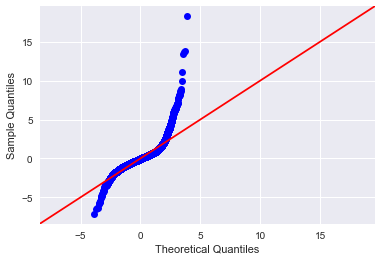

In [208]:
import scipy.stats as stats
residuals = model2.resid
sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
plt.show()

We find a curved, distorted line, then the plot shows Right Skewed Q-Q plot for Normal DIstribution.

#### check the distribution of the target

In [102]:
#y.hist();

#### bulid a module with log_scaled target

In [103]:
#x = house_preprocessed[continuous].drop(columns=["price"],axis =1)
#y_scld=np.log(y)
#X_int = sm.add_constant(x)
#model3 = sm.OLS(y_scld,X_int).fit()
#model3.summary()

In [104]:
#sm.graphics.plot_regress_exog(model3,'sqft_living',fig=plt.figure(figsize=(12,8)))

resdual:distributed around zero...hemos 

# Improve the multible linear regression

Multicollinearity could be a reason for poor perfomance when using Linear Regression Models. Multicollinearity refers to a situation where a number of independent variables in a Linear Regression model are closely correlated to one another and it can lead to skewed results. In general, multicollinearity can lead to wider confidence intervals and less reliable probability values for the independent variables.
Also maybe other assumptions of Linear Regrresion do not hold.

Multicollinearity could be a reason for poor perfomance when using Linear Regression Models. Multicollinearity refers to a situation where a number of independent variables in a Linear Regression model are closely correlated to one another and it can lead to skewed results. In general, multicollinearity can lead to wider confidence intervals and less reliable probability values for the independent variables. Also maybe other assumptions of Linear Regrresion do not hold. Linear regression needs the relationship between the independent and dependent variables to be linear. It is also important to check for outliers since linear regression is sensitive to outlier effects. The linearity assumption can best be tested with scatter plots. Linear regression analysis requires that there is little or no autocorrelation in the data. Autocorrelation occurs when the residuals are not independent from each other.

3.Multicollinearity of Features
The linearity assumptions requires that there is a linear relationship between the response variable (Y) and predictor (X). Linear means that the change in Y by 1-unit change in X, is constant.

#### Continuous Features
Since there are so many features it is helpful to filter the columns by datatype and number of unique values. A heuristic you might use to select continous variables might be a combination of features that are not object datatypes and have at least a certain amount of unique values.


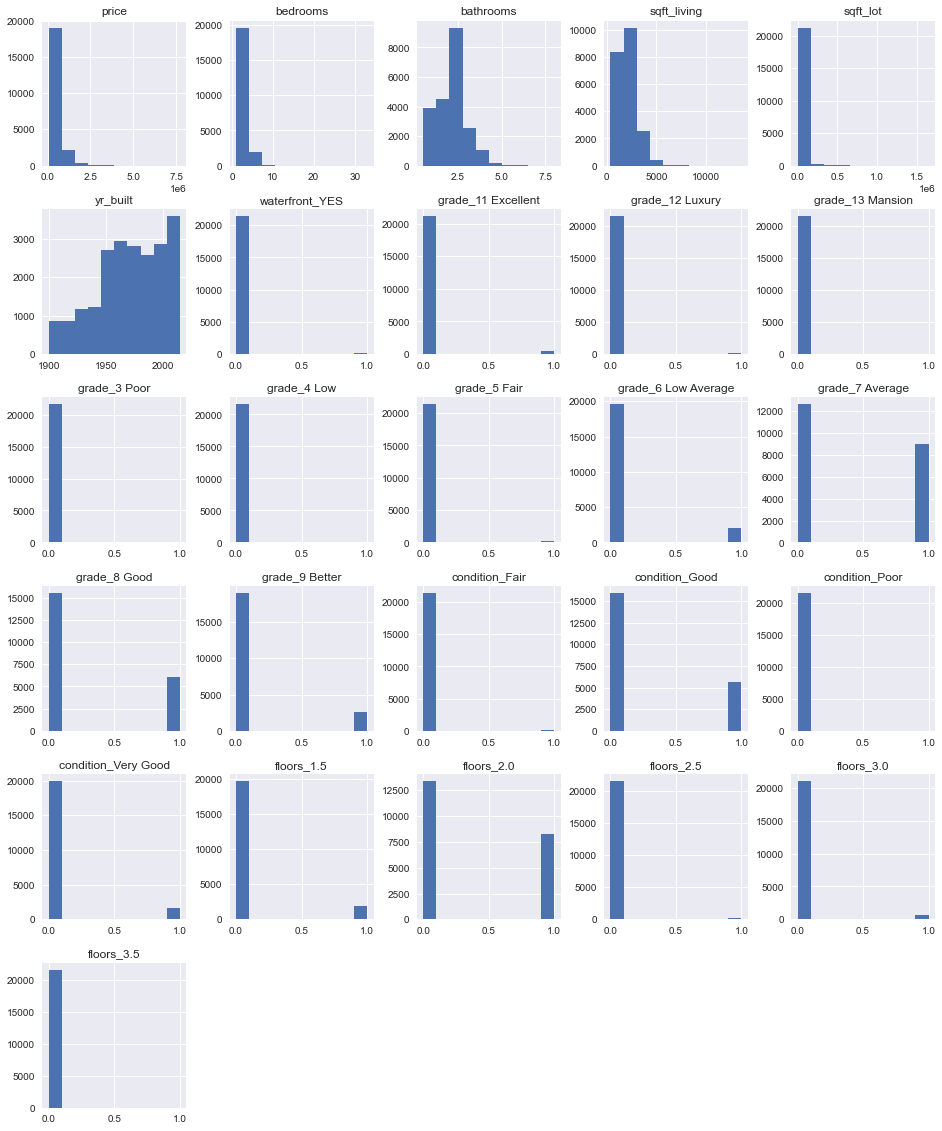

In [209]:

import warnings
warnings.filterwarnings('ignore')
fig = plt.figure(figsize = (16,20))
ax = fig.gca()
house_preprocessed.hist(ax = ax);


We can see from our histogram of the contiuous features that there are many examples where there are a ton of zeros. Lets drop these zero-inflated variables for now and select the features which don't have this characteristic.

In [210]:
# Log transform and normalize
house_cont = house_preprocessed[continuous]
house_cont

,bedrooms,sqft_living,sqft_lot,yr_built,bathrooms,price
0,3,1180,5650,1955,1.00,221900.0
1,3,2570,7242,1951,2.25,538000.0
2,2,770,10000,1933,1.00,180000.0
3,4,1960,5000,1965,3.00,604000.0
4,3,1680,8080,1987,2.00,510000.0
...,...,...,...,...,...,...
21592,3,1530,1131,2009,2.50,360000.0
21593,4,2310,5813,2014,2.50,400000.0
21594,2,1020,1350,2009,0.75,402101.0
21595,3,1600,2388,2004,2.50,400000.0


In [211]:
house_cont.corr()

,bedrooms,sqft_living,sqft_lot,yr_built,bathrooms,price
bedrooms,1.000000,0.578212,0.032471,0.155670,0.514508,0.308787
sqft_living,0.578212,1.000000,0.173453,0.318152,0.755758,0.701917
sqft_lot,0.032471,0.173453,1.000000,0.052946,0.088373,0.089876
yr_built,0.155670,0.318152,0.052946,1.000000,0.507173,0.053953
bathrooms,0.514508,0.755758,0.088373,0.507173,1.000000,0.525906
price,0.308787,0.701917,0.089876,0.053953,0.525906,1.000000


In [212]:
abs(house_cont.corr()) > 0.75

,bedrooms,sqft_living,sqft_lot,yr_built,bathrooms,price
bedrooms,True,False,False,False,False,False
sqft_living,False,True,False,False,True,False
sqft_lot,False,False,True,False,False,False
yr_built,False,False,False,True,False,False
bathrooms,False,True,False,False,True,False
price,False,False,False,False,False,True


Return True for positive or negative correlations that are bigger than 0.75 in the correlation matrix:

Now, include stack and zip to create a more robust solution that will return the variable pairs from the correlation matrix that have correlations over .75, but less than 1.

In [213]:
df=house_cont.corr().abs().stack().reset_index().sort_values(0, ascending=False)
df['pairs'] = list(zip(df.level_0, df.level_1))
df.set_index(['pairs'], inplace = True)

#drop level columns
df.drop(columns=['level_1', 'level_0'], inplace = True)
df.columns = ['cc']
df.drop_duplicates(inplace=True)
df[(df.cc>.75) & (df.cc<1)]

,cc
pairs,
"(bathrooms, sqft_living)",0.755758


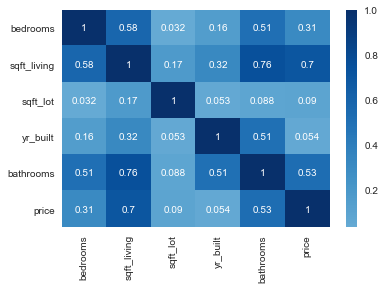

In [214]:
import seaborn as sns
sns.heatmap(house_cont.corr(), center=0,cmap='Blues', annot=True)
plt.show();

How to fix this:

1.Drop one of the two variables.

2.Create a function to create a new independent variable using the correlated features and drop the correlated features.

In [215]:
house_cont_corrs = house_cont.corr()['price'].map(abs).sort_values(ascending=False)
house_cont_corrs

price          1.000000
sqft_living    0.701917
bathrooms      0.525906
bedrooms       0.308787
sqft_lot       0.089876
yr_built       0.053953
Name: price, dtype: float64

In [216]:
house_cont.drop(columns=["bathrooms"], inplace=True)
house_cont

,bedrooms,sqft_living,sqft_lot,yr_built,price
0,3,1180,5650,1955,221900.0
1,3,2570,7242,1951,538000.0
2,2,770,10000,1933,180000.0
3,4,1960,5000,1965,604000.0
4,3,1680,8080,1987,510000.0
...,...,...,...,...,...
21592,3,1530,1131,2009,360000.0
21593,4,2310,5813,2014,400000.0
21594,2,1020,1350,2009,402101.0
21595,3,1600,2388,2004,400000.0


#### logarithmic transformations
This effective technique uses to improve the performance of linear regression models.find that having the data more normally distributed will benefit model.

#### Checking Variable Distributions

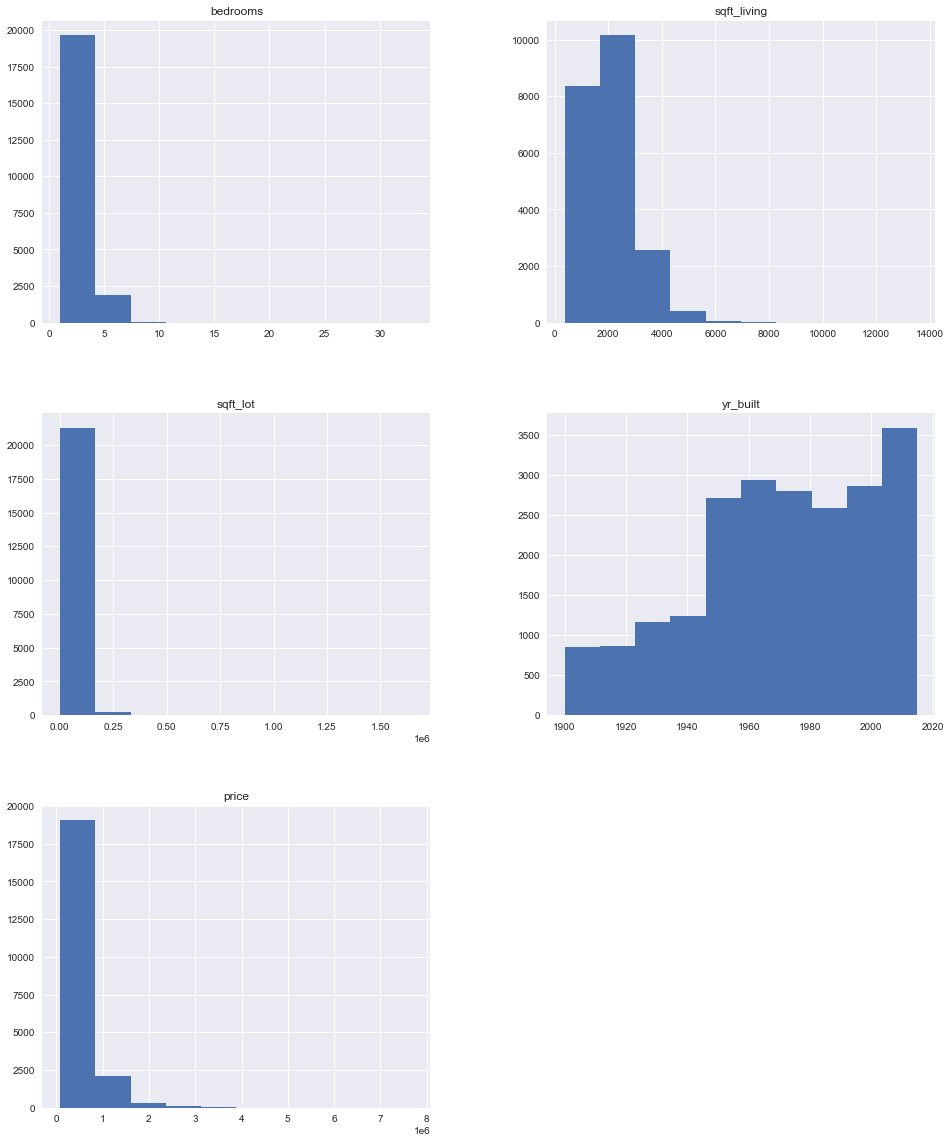

In [217]:
import warnings
warnings.filterwarnings('ignore')
fig = plt.figure(figsize = (16,20))
ax = fig.gca()
house_cont.hist(ax = ax);

We can see from our histogram of the contiuous features that there are many examples where there are a ton of zeros.

one common option for transforming non-normal variable distributions is to try applying a logarithmic function and observe its impact of the distribution.

In [114]:
#new_cont =["price","sqft_living","yr_built"]
#new_house = house_cont[new_cont]
#new_house

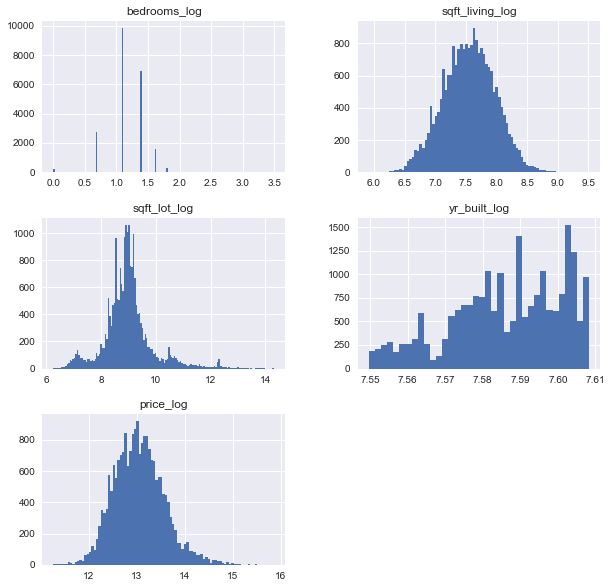

In [218]:
import numpy as np

log_names = [f'{column}_log' for column in house_cont.columns]

house_log = np.log(house_cont)
house_log.columns = log_names
house_log.hist(figsize=(10, 10), bins='auto')
fig.tight_layout();

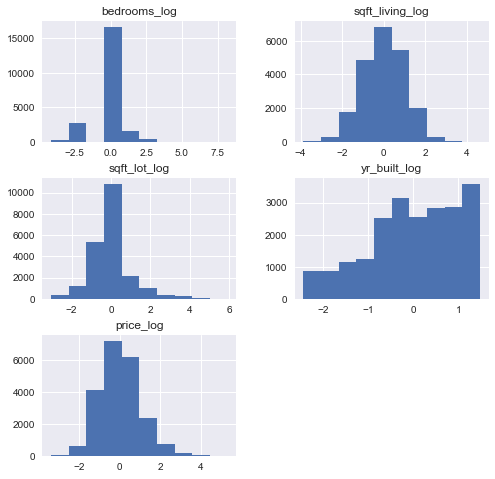

In [219]:
def normalize(feature):
    return (feature - feature.mean()) / feature.std()

features_final = house_log.apply(normalize)
house_log_norm = house_log.apply(normalize)
features_final.hist(figsize  = [8, 8]);

#### Combine Categorical and Continuous Features

In [220]:
preprocessed = pd.concat([house_log_norm,dummies ], axis=1)
preprocessed.head()

,bedrooms_log,sqft_living_log,sqft_lot_log,yr_built_log,price_log,waterfront_YES,grade_11 Excellent,grade_12 Luxury,grade_13 Mansion,grade_3 Poor,...,grade_9 Better,condition_Fair,condition_Good,condition_Poor,condition_Very Good,floors_1.5,floors_2.0,floors_2.5,floors_3.0,floors_3.5
0,-0.279718,-1.125556,-0.388430,-0.537409,-1.401998,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,-0.279718,0.709446,-0.113241,-0.674325,0.279938,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,-1.711611,-2.131893,0.244475,-1.293945,-1.799430,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.736226,0.070674,-0.523914,-0.196338,0.499698,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,-0.279718,-0.292725,0.008139,0.547946,0.178434,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [221]:
preprocessed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   bedrooms_log         21597 non-null  float64
 1   sqft_living_log      21597 non-null  float64
 2   sqft_lot_log         21597 non-null  float64
 3   yr_built_log         21597 non-null  float64
 4   price_log            21597 non-null  float64
 5   waterfront_YES       21597 non-null  uint8  
 6   grade_11 Excellent   21597 non-null  uint8  
 7   grade_12 Luxury      21597 non-null  uint8  
 8   grade_13 Mansion     21597 non-null  uint8  
 9   grade_3 Poor         21597 non-null  uint8  
 10  grade_4 Low          21597 non-null  uint8  
 11  grade_5 Fair         21597 non-null  uint8  
 12  grade_6 Low Average  21597 non-null  uint8  
 13  grade_7 Average      21597 non-null  uint8  
 14  grade_8 Good         21597 non-null  uint8  
 15  grade_9 Better       21597 non-null 

In [119]:
#preprocessed["bedrooms_log"]=preprocessed["bedrooms_log"].astype(int)
#preprocessed["sqft_living_log"]=preprocessed["sqft_living_log"].astype(int)
#preprocessed["sqft_lot_log"]=preprocessed["sqft_lot_log"].astype(int)
#preprocessed["yr_built_log"]=preprocessed["yr_built_log"].astype(int)


#### Run a multi linear model in Statsmodels with Price as the target variable

In [222]:
x = preprocessed.drop(columns=["price_log"],axis=1)
y = preprocessed["price_log"]


In [223]:
X_int = sm.add_constant(x)
model3 = sm.OLS(y,X_int).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              price_log   R-squared:                       0.646
Model:                            OLS   Adj. R-squared:                  0.646
Method:                 Least Squares   F-statistic:                     1643.
Date:                Mon, 05 Sep 2022   Prob (F-statistic):               0.00
Time:                        17:36:28   Log-Likelihood:                -19418.
No. Observations:               21597   AIC:                         3.889e+04
Df Residuals:                   21572   BIC:                         3.909e+04
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   1.0047      0.022     46.229      0.000       0.962       1.047
bedrooms_log           -0.0750      0.006    -13.576      0.000      -0.086      -0.064
sqft_living_log         0.4459      0.008     55.844      0.000       0.430       0.462
sqft_lot_log           -0.0813      0.005    -16.775      0.000      -0.091      -0.072
yr_built_log           -0.3054      0.006    -53.149      0.000      -0.317      -0.294
waterfront_YES          1.0636      0.050     21.243      0.000       0.965       1.162
grade_11 Excellent      0.4306      0.035     12.361      0.000       0.362       0.499
grade_12 Luxury         0.9119      0.066     13.799      0.000       0.782       1.041
grade_13 Mansion        1.5503      0.167      9.302      0.000       1.224       1.877
grade_3 Poor           -1.7017      0.596     -2.854      0.004      -2.870      -0.533
grade_4 Low            -2.0762      0.119    -17.454      0.000      -2.309      -1.843
grade_5 Fair           -2.1162      0.047    -44.610      0.000      -2.209      -2.023
grade_6 Low Average    -1.8207      0.029    -63.426      0.000      -1.877      -1.764
grade_7 Average        -1.3767      0.023    -60.438      0.000      -1.421      -1.332
grade_8 Good           -0.9274      0.021    -44.363      0.000      -0.968      -0.886
grade_9 Better         -0.4193      0.021    -19.537      0.000      -0.461      -0.377
condition_Fair         -0.2770      0.046     -5.959      0.000      -0.368      -0.186
condition_Good          0.0400      0.010      3.956      0.000       0.020       0.060
condition_Poor         -0.2414      0.112     -2.164      0.030      -0.460      -0.023
condition_Very Good     0.1723      0.016     10.635      0.000       0.141       0.204
floors_1.5              0.0372      0.016      2.363      0.018       0.006       0.068
floors_2.0              0.0530      0.012      4.525      0.000       0.030       0.076
floors_2.5              0.1029      0.048      2.134      0.033       0.008       0.197
floors_3.0              0.3842      0.028     13.615      0.000       0.329       0.440
floors_3.5              0.3450      0.226      1.530      0.126      -0.097       0.787
==============================================================================
Omnibus:                       61.431   Durbin-Watson:                   1.968
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               75.795
Skew:                          -0.050   Prob(JB):                     3.48e-17
Kurtosis:                       3.272   Cond. No.                         211.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### model4

In [224]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [225]:
regression = LinearRegression()

In [229]:
y =house_preprocessed["price"]
x =house_preprocessed.drop(columns=["price"],axis=1)
house_preprocessed

,price,bedrooms,bathrooms,sqft_living,sqft_lot,yr_built,waterfront_YES,grade_11 Excellent,grade_12 Luxury,grade_13 Mansion,...,grade_9 Better,condition_Fair,condition_Good,condition_Poor,condition_Very Good,floors_1.5,floors_2.0,floors_2.5,floors_3.0,floors_3.5
0,221900.0,3,1.00,1180,5650,1955,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,538000.0,3,2.25,2570,7242,1951,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,180000.0,2,1.00,770,10000,1933,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,604000.0,4,3.00,1960,5000,1965,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,510000.0,3,2.00,1680,8080,1987,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,360000.0,3,2.50,1530,1131,2009,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
21593,400000.0,4,2.50,2310,5813,2014,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
21594,402101.0,2,0.75,1020,1350,2009,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
21595,400000.0,3,2.50,1600,2388,2004,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [230]:
crossvalidation = KFold(n_splits=2, shuffle=True, random_state=1)
baseline = np.mean(cross_val_score(regression ,x, y, scoring='r2', cv=crossvalidation))

baseline

0.6617655569990769

#### Model Evaluation
Recall some ways that we can evaluate linear regression models.

#### Residuals
The difference between the two values of target the origenal one and the predected one.to determine the impact of residuals we need to split the data by using the train - test split. 

#### Train-Test Split
The procedure involves taking a dataset and dividing it into two subsets. The first subset is used to fit the model and is referred to as the training dataset. The second subset is not used to train the model; instead, the input element of the dataset is provided to the model, then predictions are made and compared to the expected values. This second dataset is referred to as the test dataset.

1-Train Dataset: Used to fit the machine learning model.

2-Test Dataset: Used to evaluate the fit machine learning model.

must choose a split percentage that meets  project’s objectives.
common split percentages include:

Train: 80%, Test: 20% ,
Train: 67%, Test: 33% ,
Train: 50%, Test: 50% .

In [231]:
from itertools import combinations

interactions = []

feat_combinations = combinations(x.columns, 2)
data = x.copy()
for i, (a, b) in enumerate(feat_combinations):
    data['interaction'] = data[a] * data[b]
    score = np.mean(cross_val_score(regression, data, y, scoring='r2', cv=crossvalidation))
    if score > baseline:
        interactions.append((a, b, round(score,3)))
    if i % 50 == 0:
        print(i)
            
print('Top 3 interactions: %s' %sorted(interactions, key=lambda inter: inter[2], reverse=True)[:3]) 

0
50
100
150
200
250
Top 3 interactions: [('sqft_living', 'waterfront_YES', 0.675), ('bathrooms', 'sqft_living', 0.674), ('bathrooms', 'grade_13 Mansion', 0.67)]


In [233]:
regression = LinearRegression()
crossvalidation = KFold(n_splits=25, shuffle=True, random_state=1)
final = x.copy()

final['sqft_living'*'waterfront_YES'] = final ['sqft_living'] * final['waterfront_YES']
final_model = np.mean(cross_val_score(regression, final, y, scoring='r2', cv=crossvalidation))

final_model

TypeError: can't multiply sequence by non-int of type 'str'

#### Fit a Model

In [ ]:
#from sklearn.linear_model import LinearRegression

#model4 = LinearRegression()
#model4.fit(X_train, y_train)


In [ ]:
#X_train

In [ ]:
#X_train.info()

In [ ]:
#model4.fit(X_train, y_train)

In [ ]:
#from sklearn.model_selection import cross_val_score

#cross_val_score(model4, X_train, y_train, cv=3)

In [ ]:
#X_test

In [ ]:
#model4.fit(X_train, y_train)
#model4.score(X_test,y_test)

In [ ]:
#from sklearn.linear_model import LinearRegression
#from sklearn.model_selection import cross_val_score
#from sklearn.model_selection import KFold
#crossvalidation = KFold(n_splits=10, shuffle=True, random_state=1)
#baseline = np.mean(cross_val_score(model4, X, y, scoring='r2', cv=crossvalidation))
#baseline

#### See how interactions improve your baseline
create all possible combinations of interactions, loop over them and add them to the baseline model one by one to see how they affect the R square . We'll look at the 3 interactions which have the biggest effect on our R square , so print out the top 3 combinations.We can use combinations from itertools to create a list of all the pairwise combinations.

In [ ]:
#regression = LinearRegression()
#crossvalidation = KFold(n_splits=10, shuffle=True, random_state=1)
#final = X.copy()

#final[''] = final['Neighborhood_Edwards'] * final['LotArea']

#final_model = np.mean(cross_val_score(regression, final, y, scoring='r2', cv=crossvalidation))

#final_model

doent improve

#### Log Transformations

find that having the data more normally distributed will benefit your model and model performance in general

#### Checking Variable Distributions
You do have an initial model displayed above, but this can be improved. The first step you should take prior to simply fitting your model is to see how each of the variables are related to one another.

Transformations that can be applied to fix skewness:

Logarithmic Transformation: This works best if the data is right-skewed, i.e the distribution has a long tail on the right end.

In [ ]:
# Log transform and normalize
log_names = [f'{column}_log' for column in house_cont.columns]
house_log = np.log(house_cont)
house_log.columns = log_names

# normalize (subract mean and divide by std)

def normalize(feature):
    return (feature - feature.mean()) / feature.std()

house_log_norm = house_log.apply(normalize)

In [ ]:
house_log_norm

In [ ]:
x = house_log_norm.drop(columns=["price_log"],axis=1)
y = house_log_norm["price_log"]


In [ ]:
x_int = sm.add_constant(x)
model5 = sm.OLS(y,x_int ).fit()
model5.summary()

#### moduel6: adding Categorical Features

In [ ]:
house[categoricals]

In [ ]:
house_ohe = pd.get_dummies(house[categoricals], prefix=categoricals, drop_first=True)
house_ohe

#### Combine Categorical and Continuous Features

In [ ]:
preprocessed = pd.concat([house_log_norm,dummies ], axis=1)
preprocessed.head()

### Run a linear model with SalePrice as the target variable in statsmodels

In [ ]:
X = preprocessed.drop(columns=['price_log'], axis=1)
y = preprocessed['price_log']

In [ ]:
X_int = sm.add_constant(X)
model6 = sm.OLS(y,X_int).fit()
model6.summary()

#### model7:Categorical

In [ ]:
X = preprocessed.drop(columns=['price_log',"bedrooms_log","sqft_lot_log","yr_built_log"], axis=1)
y = preprocessed["price_log"]

In [ ]:
X_int = sm.add_constant(X)
model7 = sm.OLS(y,X_int).fit()
model7.summary()